In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('loan_prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [5]:
df['Gender'] = df['Gender'].fillna( 
                               df['Gender'].dropna().mode().values[0] )
df['Married'] = df['Married'].fillna( 
                               df['Married'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].fillna( 
                               df['Dependents'].dropna().mode().values[0] )
df['Self_Employed'] = df['Self_Employed'].fillna( 
                               df['Self_Employed'].dropna().mode().values[0] )
df['LoanAmount'] = df['LoanAmount'].fillna( 
                               df['LoanAmount'].dropna().mean() )
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna( 
                               df['Loan_Amount_Term'].dropna().mode().values[0] )
df['Credit_History'] = df['Credit_History'].fillna(
                               df['Credit_History'].dropna().mode().values[0] )

In [6]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

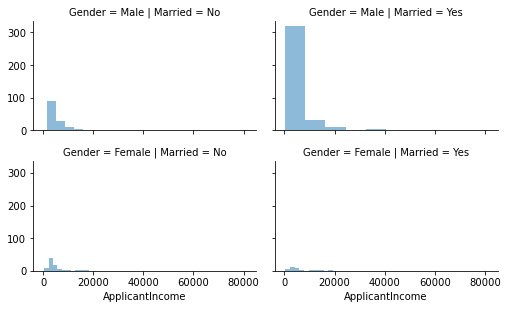

In [7]:
grid = sns.FacetGrid(df, row='Gender', col='Married', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

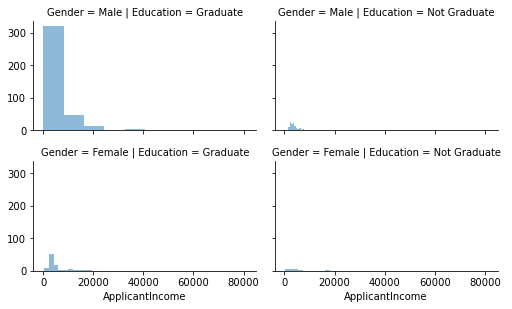

In [8]:
grid = sns.FacetGrid(df, row='Gender', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

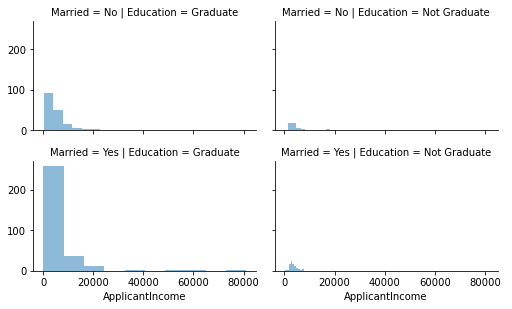

In [9]:
grid = sns.FacetGrid(df, row='Married', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

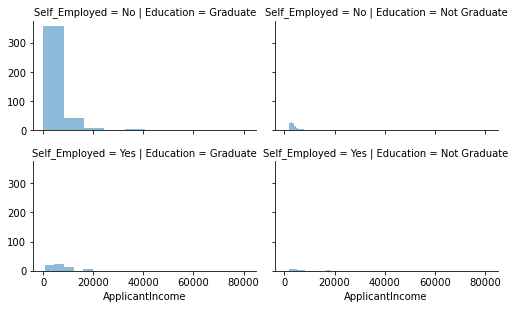

In [10]:
grid = sns.FacetGrid(df, row='Self_Employed', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

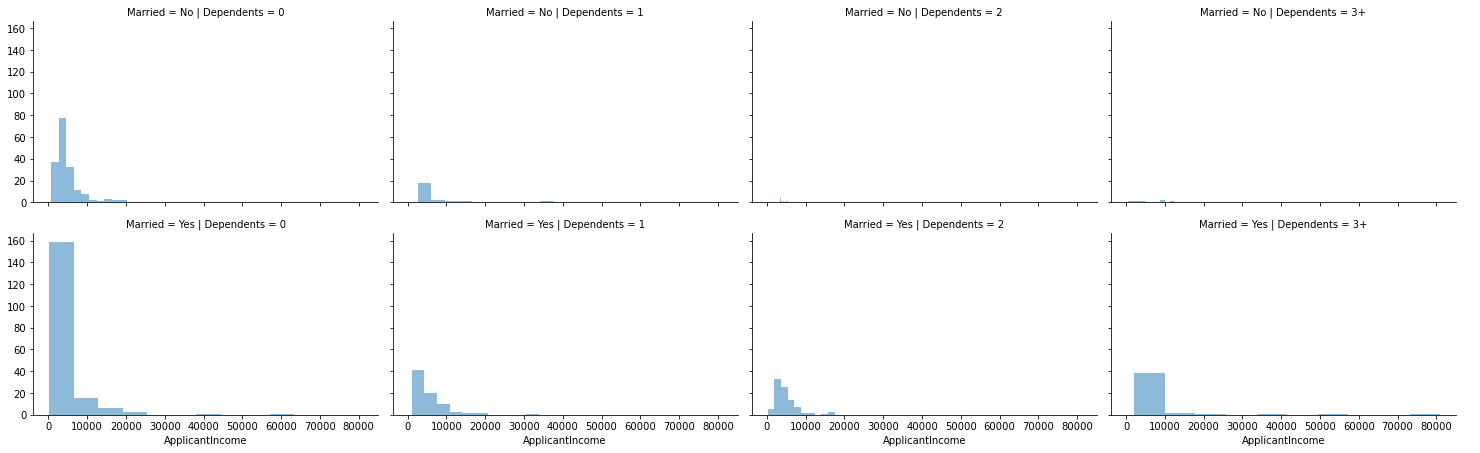

In [11]:
grid = sns.FacetGrid(df, row='Married', col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

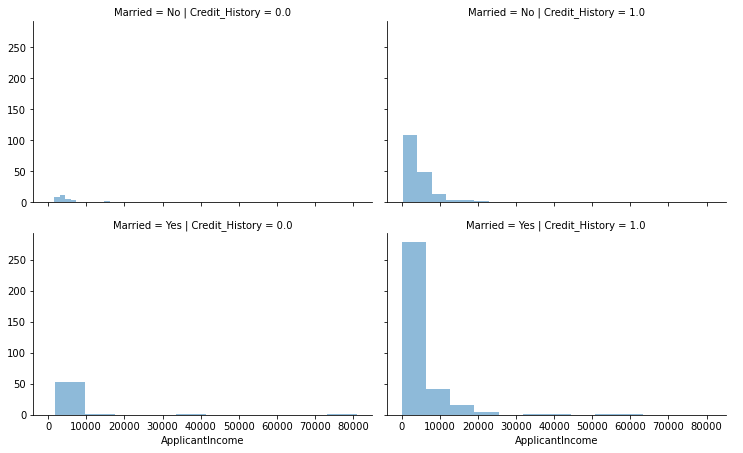

In [12]:
grid = sns.FacetGrid(df, row='Married', col='Credit_History', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

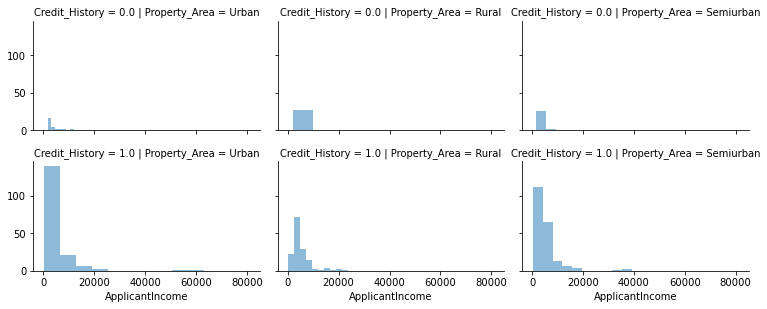

In [13]:
grid = sns.FacetGrid(df, row='Credit_History', col='Property_Area', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

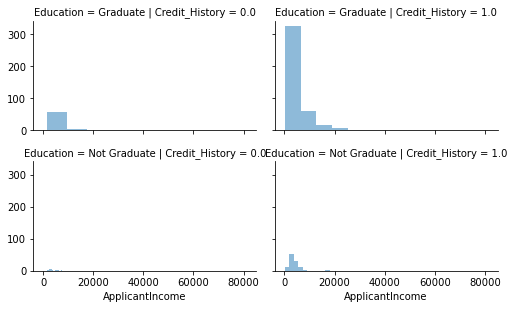

In [14]:
grid = sns.FacetGrid(df, row='Education', col='Credit_History', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

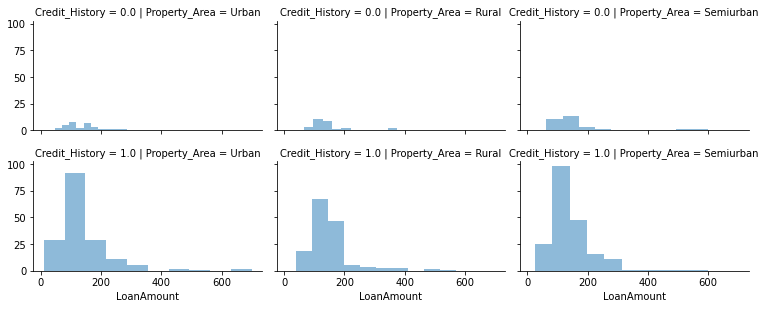

In [15]:
grid = sns.FacetGrid(df, row='Credit_History', col='Property_Area', size=2.2, aspect=1.6)
grid.map(plt.hist, 'LoanAmount', alpha=.5, bins=10)
grid.add_legend()

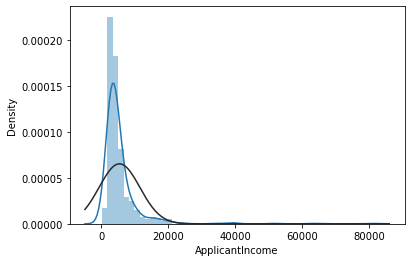

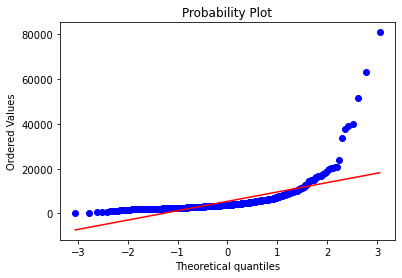

In [16]:
#histogram and normal probability plot
sns.distplot(df['ApplicantIncome'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['ApplicantIncome'], plot=plt)

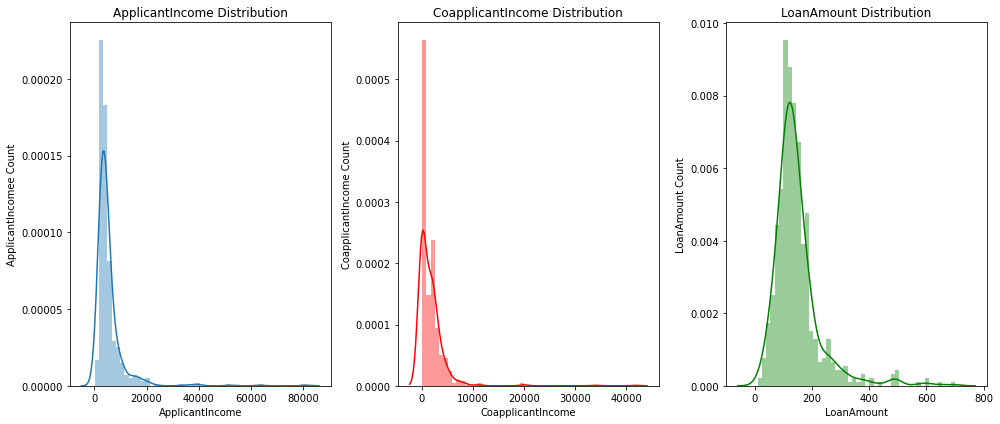

<Figure size 432x288 with 0 Axes>

In [17]:
flg, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14,6))

sns.distplot(df['ApplicantIncome'], ax = axes[0]).set_title('ApplicantIncome Distribution')
axes[0].set_ylabel('ApplicantIncomee Count')

sns.distplot(df['CoapplicantIncome'], color = "r", ax = axes[1]).set_title('CoapplicantIncome Distribution')
axes[1].set_ylabel('CoapplicantIncome Count')

sns.distplot(df['LoanAmount'],color = "g", ax = axes[2]).set_title('LoanAmount Distribution')
axes[2].set_ylabel('LoanAmount Count')

plt.tight_layout()
plt.show()
plt.gcf().clear()

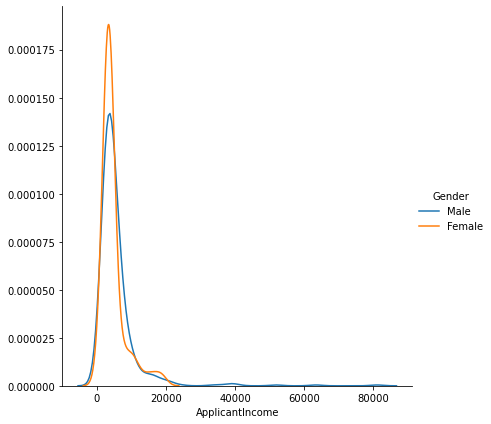

In [18]:
sns.FacetGrid(df, hue="Gender", size=6) \
   .map(sns.kdeplot, "ApplicantIncome") \
   .add_legend()

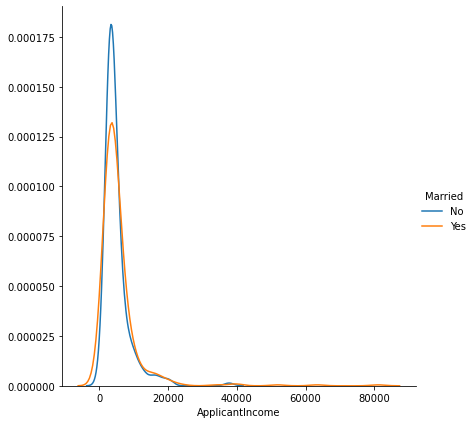

In [19]:
sns.FacetGrid(df, hue="Married", size=6) \
   .map(sns.kdeplot, "ApplicantIncome") \
   .add_legend()

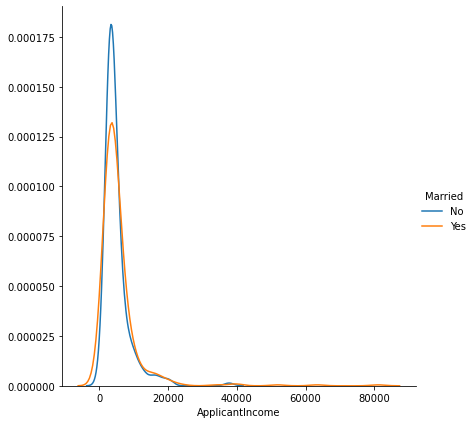

In [20]:

sns.FacetGrid(df, hue="Married", size=6) \
   .map(sns.kdeplot, "ApplicantIncome") \
   .add_legend()

In [21]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

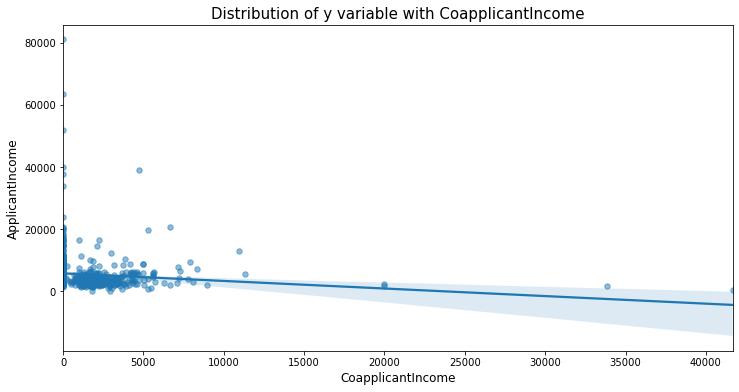

In [22]:
var_name = "CoapplicantIncome"
plt.figure(figsize=(12,6))
sns.regplot(x=var_name, y='ApplicantIncome', data=df, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('ApplicantIncome', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

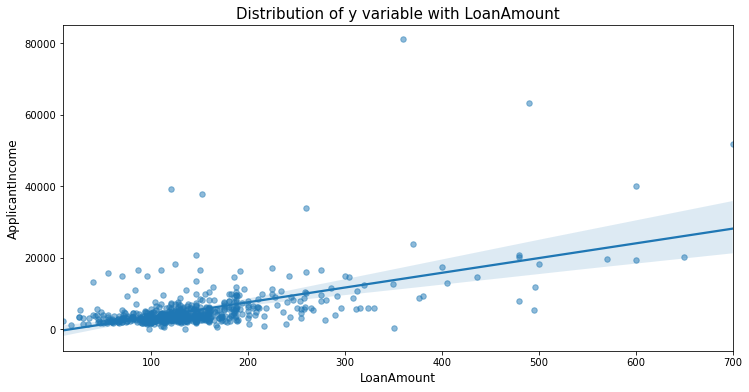

In [23]:
var_name = "LoanAmount"
plt.figure(figsize=(12,6))
sns.regplot(x=var_name, y='ApplicantIncome', data=df, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('ApplicantIncome', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

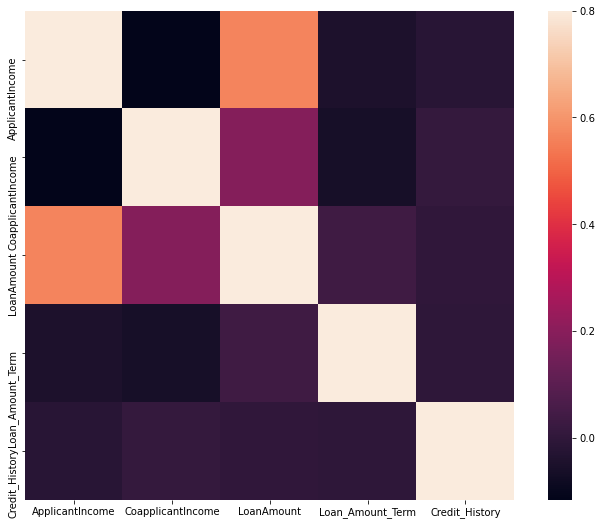

In [24]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

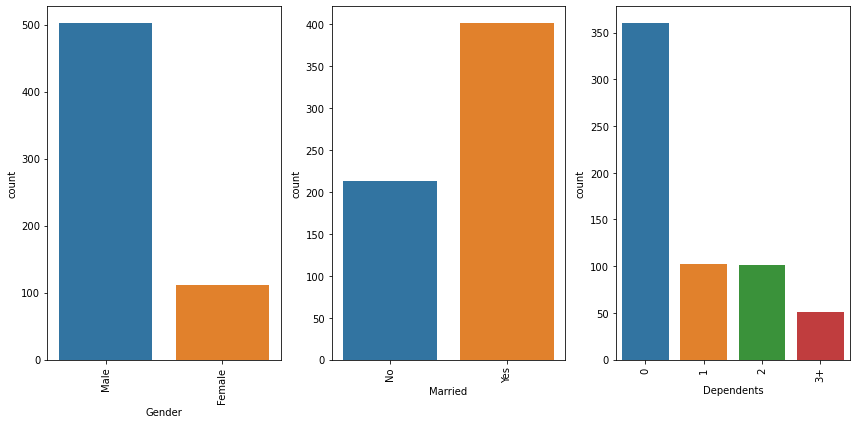

<Figure size 432x288 with 0 Axes>

In [25]:
fig, axes = plt.subplots(ncols=3,figsize=(12,6))

g = sns.countplot(df["Gender"], ax=axes[0])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(df["Married"], ax=axes[1])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(df["Dependents"], ax=axes[2])
plt.setp(g.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()
plt.gcf().clear()

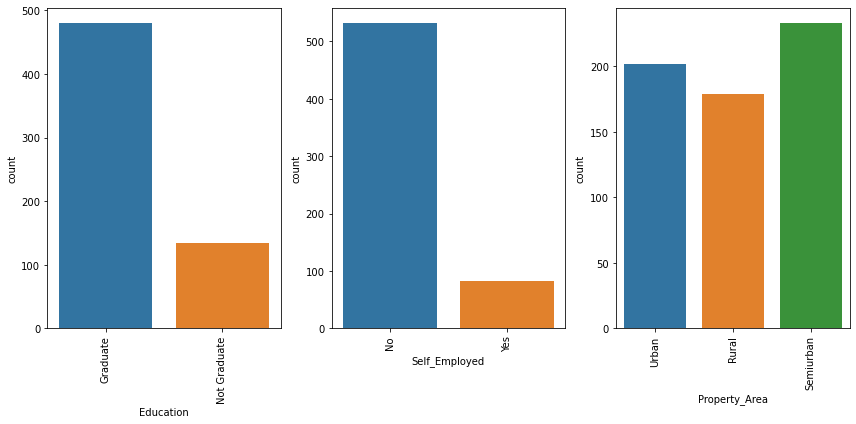

<Figure size 432x288 with 0 Axes>

In [26]:
fig, axes = plt.subplots(ncols=3,figsize=(12,6))

g = sns.countplot(df["Education"], ax=axes[0])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(df["Self_Employed"], ax=axes[1])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(df["Property_Area"], ax=axes[2])
plt.setp(g.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()
plt.gcf().clear()

In [27]:
print(df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  146.412162        342.410423   
std        6109.041673        2926.248369   84.037468         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  129.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [28]:
df.shape

(614, 13)

In [29]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [30]:
df[['Gender', 'ApplicantIncome']].groupby(['Gender'],
                                               as_index = False).mean().sort_values(by = 'Gender', ascending = False)

,Gender,ApplicantIncome
1,Male,5573.017928
0,Female,4643.473214


In [31]:
df[['Married', 'ApplicantIncome']].groupby(['Married'],
                                               as_index = False).mean().sort_values(by = 'Married', ascending = False)

,Married,ApplicantIncome
1,Yes,5633.496259
0,No,4970.384977


In [32]:
df[['Dependents', 'ApplicantIncome']].groupby(['Dependents'],
                                               as_index = False).mean().sort_values(by = 'Dependents', ascending = False)

,Dependents,ApplicantIncome
3,3+,8581.215686
2,2,4926.782178
1,1,5962.274510
0,0,4928.680556


In [33]:
df[['Education', 'ApplicantIncome']].groupby(['Education'],
                                               as_index = False).mean().sort_values(by = 'Education', ascending = False)

,Education,ApplicantIncome
1,Not Graduate,3777.283582
0,Graduate,5857.433333


In [34]:
df[['Self_Employed', 'ApplicantIncome']].groupby(['Self_Employed'],
                                               as_index = False).mean().sort_values(by = 'Self_Employed', ascending = False)

,Self_Employed,ApplicantIncome
1,Yes,7380.817073
0,No,5098.678571


In [35]:
df[['Gender', 'Married', 'ApplicantIncome']].groupby(['Gender', 'Married'],
                                               as_index = False).mean().sort_values(by = 'Gender', 
                                                                                          ascending = False)

,Gender,Married,ApplicantIncome
2,Male,No,5251.045113
3,Male,Yes,5689.067751
0,Female,No,4503.787500
1,Female,Yes,4992.687500


In [36]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column]=LE.fit_transform(df[column])

In [37]:
df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [38]:
df.drop("Loan_ID",axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,306,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,139,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,90,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,381,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,125,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,275,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,431,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,422,0.0,187.000000,360.0,1.0,2,1


In [39]:
x=df.drop("Loan_Status",axis=1)
y=df['Loan_Status']

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

# Logistic Regression

In [42]:
lg=LogisticRegression()

In [43]:
lg.fit(x_train,y_train)

LogisticRegression()

In [44]:
pred=lg.predict(x_test)
print (pred)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1]


In [45]:
print("accuracy_score:",accuracy_score(y_test,pred))

accuracy_score: 0.7980295566502463


In [46]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.46      0.62        72
           1       0.77      0.98      0.86       131

    accuracy                           0.80       203
   macro avg       0.86      0.72      0.74       203
weighted avg       0.83      0.80      0.78       203



# DECISION TREE CLASSIFIER

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7044334975369458
              precision    recall  f1-score   support

           0       0.59      0.57      0.58        72
           1       0.77      0.78      0.77       131

    accuracy                           0.70       203
   macro avg       0.68      0.67      0.68       203
weighted avg       0.70      0.70      0.70       203



# Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8029556650246306
              precision    recall  f1-score   support

           0       0.88      0.51      0.65        72
           1       0.78      0.96      0.86       131

    accuracy                           0.80       203
   macro avg       0.83      0.74      0.76       203
weighted avg       0.82      0.80      0.79       203



# Support Factor Classifier

In [51]:
from sklearn.svm import SVC

In [52]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.645320197044335
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.65      1.00      0.78       131

    accuracy                           0.65       203
   macro avg       0.32      0.50      0.39       203
weighted avg       0.42      0.65      0.51       203



# Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(dtc,x,y,cv=5).mean())
print(cross_val_score(svc,x,y,cv=5).mean())
print(cross_val_score(rfc,x,y,cv=5).mean())
print(cross_val_score(lg,x,y,cv=5).mean())

0.6872317739570839
0.6889244302279088
0.7817139810742371
0.8029588164734107


In [ ]:
difference
lg=0.005
dtc=0.017
rfc=0.02
svc=0.43

# saving the model

In [63]:
import joblib
joblib.dump(LogisticRegression,"loanprediction.pkl")

['loanprediction.pkl']